## Oyh Oyh mouissaillon, va tu survive au Titanic ?

Tiré du Kaggle, Titanic (https://www.kaggle.com/c/titanic/overview)

In [1]:
import pandas as pd
from matplotlib import pyplot as plt


In [ ]:
#!pip list

### Téléchargement des csv

In [ ]:
!wget https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/test.csv --no-check-certificate
!wget https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/train.csv --no-check-certificate
#!wget https://raw.githubusercontent.com/minsuk-heo/kaggle-titanic/master/input/gender_submission.csv --no-check-certificate

### Analyse basique des données de "Train.csv"

On importe les deux dataset, et on ne va se servir que de "train" (jeu d'entrainement pour l'algorithme) pour le moment, le "test" servira pour vérifier la véracité de notre algo sur la survie.
En effet, le sujet est tiré d'un concours sur kaggle ou le jeu de donnée est déjà séparé en deux.

In [2]:
# la méthode read de pandas, se traduit bien d'elle même (งツ)ว

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

# une liste contenant les deux fichiers, pour appliquer le nettoyage au deux d'un coup

dataset = [df_train, df_test]

In [3]:
### info, pour avoir des infos rapidement sur le type dans les colonnes, 
## ainsi que sur le nom des colonnes, plus les valeurs nulles 

print("******\ntrain\n")
print(df_train.info())
print("\n******\ntest\n")
df_test.info()

******
train

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

******
test

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 

In [24]:
# aperçu rapide de ce qu'il y a dans le tableau, 
# en affichant des entrées au hasard

df_train.sample(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
207,208,1,3,"Albimona, Mr. Nassef Cassem",male,26.0,0,0,2699,18.7875,NaN,C
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
869,870,1,3,"Johnson, Master. Harold Theodor",male,4.0,1,1,347742,11.1333,NaN,S
531,532,0,3,"Toufik, Mr. Nakli",male,NaN,0,0,2641,7.2292,NaN,C
473,474,1,2,"Jerwan, Mrs. Amin S (Marie Marthe Thuillard)",female,23.0,0,0,SC/AH Basle 541,13.7917,D,C
770,771,0,3,"Lievens, Mr. Rene Aime",male,24.0,0,0,345781,9.5000,NaN,S
109,110,1,3,"Moran, Miss. Bertha",female,NaN,1,0,371110,24.1500,NaN,Q


### 891 lignes au total pour le train, 418 pour le test, et on constate que dans les deux il manque beaucoup de donnée dans "Age" et dans "Cabin"

## A partir de maintenant, on analyse seulement le train, mais on applique les méthodes aux deux dataframes

In [4]:
# pour confirmer la propreté du csv

df_train.isnull().sum().sort_values(ascending=False) 

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [51]:
# describe permet de donner le total, la moyenne, l'écart type, la valeur minimale, 
# le 1er quartile jusqu'a la valeur la plus importante
# mais bien sur, cela ne fonctionne qu'avec les valeurs numériques

df_train.describe()

# on peut passer l'argument"""  include='all'  """pour prendre en compte les valeur non numérique

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Quelques visualisations pour se représenter le dataset

<AxesSubplot:ylabel='Frequency'>

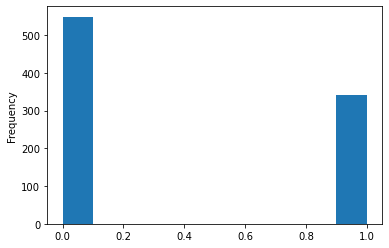

In [44]:
## pandas permet de faire un graphique plutot facilement en 1 seule ligne
# ici en retirant ) # on ajoute seulement 2 argument, et c'est déjà plus présentable

df_train["Survived"].plot(kind="hist") #, figsize=(5,11), title="Survivants")   

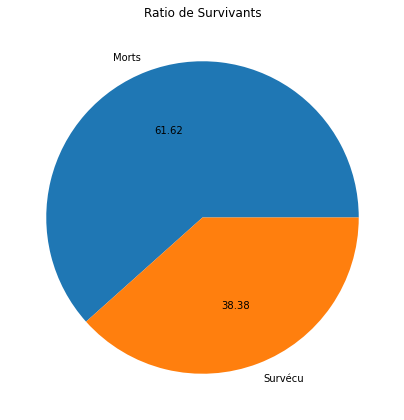

In [48]:
# même colonne, mais avec plus d'argument pour rendre le graphique plus parlant

df_train.Survived.value_counts().plot(      # le value_counts pour grouper tous les 1 et 0 ensembles

    kind="pie", # kind pour les différents types de graph, ici un camembert
    figsize=(7,11), # la taille affiché dans la cellule, Largeur Hauteur
    labels=["Morts", "Survécu"], # le nom de chaque partie
    autopct="%.2f", # pour afficher le % 
    title="Ratio de Survivants", # le titre du graphique
    ylabel="" # aussi non affiche le nom de la colone a gauche du graph
    )
plt.show()  # c'est optionel dans un notebook, mais plus propre

### Attention aux yeux
#### mais, bon y'a des informations utiles ( ˘ ɜ˘) ♬♪♫

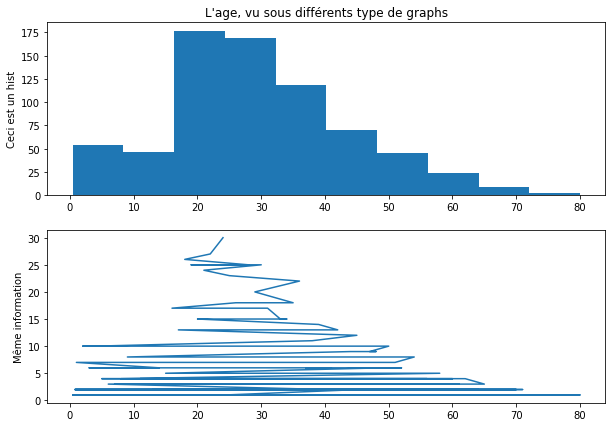

In [66]:
# c'est clair ?

plt.subplot(2, 1, 1)  #  2 lignes et 1 colonnes, c'est le 1er du bloc
df_train.Age.plot(kind="hist", figsize=(10,7), ylabel="")
plt.title("L'age, vu sous différents type de graphs")
plt.ylabel("Ceci est un hist")

plt.subplot(2, 1, 2)  # 2 lignes 1 col 2eme du bloc
df_train.Age.value_counts().plot()  ## oui c'est les même informations, mais moins lisible
plt.ylabel("Même information")

plt.show()  

In [12]:
## nunique indique le nombre de valeur différentes dans cette colonne
# unique montre toutes les valeurs de celle ci


print("Il y a " + str(df_train.Age.nunique()) + " ages différents répertorié\n Et les voicis tous \n\n")
print(df_train.Age.unique())
print("\nMais: " + str( df_train.Age.isnull().sum() ) + " ligne ne contenant pas l'age, ce qui peut poser problème avec certaine méthodes ou graph")

# df["colonne"].isnull().sum() -> donne le nombre de nan dans la col


Il y a 88 ages différents répertorié
 Et les voicis tous 


[22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]

Mais: 177 ligne ne contenant pas l'age, ce qui peut poser problème avec certaine méthodes ou graph
891


In [14]:
## supressions des valeurs non indiqué dans cette colonne et engeristré dans une nouvelle variable
# sur laquel on applique la méthode round 


age_rond = df_train.Age.dropna()
age_rond = [round(x) for x in age_rond]

# avant, après 

print(len(df_train.Age))
print(len(age_rond))

891
714


In [7]:
age_rond.isnull().sum()

NameError: name 'age_rond' is not defined

In [72]:
df_train.Age.plot(kind="bar")

<AxesSubplot:>

Error in callback <function flush_figures at 0x0000017E0D762AF0> (for post_execute):


KeyboardInterrupt: 

<AxesSubplot:>

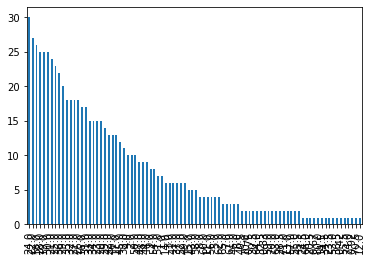

In [73]:
df_train.Age.value_counts().plot(kind="bar")

<AxesSubplot:>

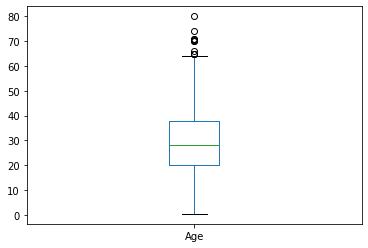

In [69]:
df_train.Age.plot(kind="box")

In [ ]:
g = sns.PairGrid(df)
g.map(sns.scatterplot)

enfant = df[(df["Age"] >= 0) & (df["Age"] <= 10)]
ado = df[(df["Age"] >=11) & (df["Age"] <= 20)]
adulte = df[(df["Age"] >=21) & (df["Age"] <= 50)]
ancien = df[(df["Age"] >=51)]
type(enfant)

df.Age = df.Age.map({'enfant' : 0, 'ado' : 1, 'adulte' : 2, 'ancien' : 3})

In [ ]:
df.Sex = df.Sex.map({'female' : 0, 'male' : 1})

In [ ]:
df.Sex.value_counts().plot(kind="bar", figsize=(5,11))

#### Création de la colone de la langue parlé, si le passager à embarqué à Cherbourg ou non 

In [ ]:
df.Embarked.nunique()

In [ ]:
df["Embarked"].unique()

In [ ]:
df.Embarked = df.Embarked.map({'C' : 0, 'Q' : 1, 'S' : 2})
anglophone = (df["Embarked"] == 1) | (df["Embarked"] == 2)
df["anglophone"] = anglophone

In [ ]:
df.Embarked.plot(kind='hist', figsize=(7,11))

### Transformation en int

In [ ]:
#df.anglophone = df.anglophone.map({'False' : 0, 'True' : 1})

In [ ]:
df["anglophone"] = df["anglophone"].astype(int)

In [ ]:
df.anglophone.value_counts()

In [ ]:
anglophone.unique()

In [ ]:
df.anglophone.unique()

In [ ]:
df["anglophone"]

In [ ]:
df.anglophone.plot(kind="hist", figsize=(7,11))

In [ ]:
pd.pivot_table(df, 
               values='Survived',
               index=['Pclass', "anglophone"],
               columns=['Sex'],
               aggfunc='sum'
              ).plot(kind='bar', figsize=(11,11))

#### maintenant occupons nous de la colonne age, basiquement on va modifier les valeurs manquante par la moyenne, puis on supprime les colonnes qui ne nous intéresse pas pour le ML

In [ ]:
df.info()

In [ ]:
df["Age"] = df["Age"].fillna(df["Age"].mean())

In [ ]:
df = df.drop(["Cabin", "Embarked", "Ticket", "Name", "Fare","PassengerId" ], axis=1)

In [ ]:
df_test = pd.read_csv("test.csv")

In [ ]:
df_test["Survived"] = ''
df_test["Survived"] = pd.to_numeric(df.Survived)
df_test.Embarked = df_test.Embarked.map({'C' : 0, 'Q' : 1, 'S' : 2})
anglophone = (df_test["Embarked"] == 1) | (df_test["Embarked"] == 2)
df_test["anglophone"] = anglophone
df_test["anglophone"] = df_test["anglophone"].astype(int)
df_test.Sex = df_test.Sex.map({'female' : 0, 'male' : 1})
df_test["Age"] = df_test["Age"].fillna(df_test["Age"].mean())
df_test = df_test.drop(["Cabin", "Embarked", "Ticket", "Name", "Fare","PassengerId"], axis=1)

In [ ]:
df_test = df_test[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'anglophone']]

In [ ]:
df.info()

### Début de l'utilisation des données

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
X = df
y = df.Survived

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.28, random_state=42, stratify=y)

In [ ]:
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

In [ ]:
xgb.plot_importance(model)

In [ ]:
model.score(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [ ]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [ ]:
nage = model.predict(df_test)
nageur = [round(value) for value in nage]
alors = accuracy_score(nage, nageur)
print("Accuracy: %.2f%%" % (alors * 100.0))

In [ ]:
boost = xgb.Booster({'nthread': 4})
boost.load_model()
X = df
y = df.Survived

dtest = xgb.DMatrix(X)
pred = boost.predict(dtest)
pred_bin = [round(value) for value in pred]